# Edu-ConvoKit: Apply Student Talk Moves to the NCTE dataset

In [36]:
!pip install edu-convokit
!pip show edu-convokit

Name: edu_convokit
Version: 0.4.0
Summary: Edu-ConvoKit: An Open-Source Framework for Education Conversation Data
Home-page: https://github.com/rosewang2008/edu-convokit
Author: Rose E. Wang
Author-email: rewang@cs.stanford.edu
License: MIT
Location: /opt/anaconda3/envs/educ473/lib/python3.11/site-packages
Requires: clean-text, gensim, matplotlib, nltk, num2words, numpy, openai, openpyxl, pandas, python-dotenv, scikit-learn, scipy, seaborn, spacy, tenacity, tiktoken, torch, tqdm, transformers
Required-by: 


In [37]:
from edu_convokit.preprocessors import TextPreprocessor
from edu_convokit.annotation import Annotator
from edu_convokit.analyzers import (
    QualitativeAnalyzer,
    QuantitativeAnalyzer,
    LexicalAnalyzer,
    TemporalAnalyzer,
    GPTConversationAnalyzer
)
# For helping us load data
from edu_convokit import utils

import os
import tqdm

## 📑 Data

IMPORTANT: Modify this to be the path to ncte_single_utterances.csv

In [ ]:
SINGLE_UTTERANCES_DATA = "NCTE/ncte_single_utterances.csv" # full NCTE ncte_single_utterances

These are the columns of our annotated dataset.

In [39]:
TEXT_COLUMN = "text"
SPEAKER_COLUMN = "speaker"

# Annotations
STUDENT_REASONING_COLUMN = "student_reasoning"
MATH_DENSITY_COLUMN = "math_density"
STUDENT_TALK_MOVES_COLUMN = "student_talk_moves"

Note: Choosing to leave out multiple students from the STUDENT_SPEAKER category

In [40]:
STUDENT_SPEAKER = 'student'    
TEACHER_SPEAKER = 'teacher'

## 📝 Text Pre-Processing and Annotation

In [44]:
processor = TextPreprocessor()
annotator = Annotator()

# for filename in tqdm.tqdm(os.listdir(DATA_DIR)):
#     if utils.is_valid_file_extension(filename):
#         df = utils.load_data(os.path.join(DATA_DIR, filename))

#     # TODO: Do we want to do this??? I just notice that all of the Edu-Convokit tutorials do this
#     df = processor.merge_utterances_from_same_speaker(
#         df=df,
#         text_column=TEXT_COLUMN,
#         speaker_column=SPEAKER_COLUMN,
#         target_text_column=TEXT_COLUMN
#     )

df = utils.load_data(SINGLE_UTTERANCES_DATA)
df = processor.merge_utterances_from_same_speaker(
        df=df,
        text_column=TEXT_COLUMN,
        speaker_column=SPEAKER_COLUMN,
        target_text_column=TEXT_COLUMN
    )


In [45]:
df

,text,speaker
0,"Friends, yesterday we started off by working o...",teacher
1,Yes.,student
2,"And yesterday towards the end of the period, y...",teacher
3,Yes.,multiple students
4,Some of you might be done. If you are finishe...,teacher
...,...,...
532976,Can you hit the mouse so we can see. You shoul...,teacher
532977,I’ll go first.,student
532978,What do you want to ask her if she has?,teacher
532979,"If she has 5, 1.",student


In [46]:
# Gather our three annotations

df = annotator.get_student_reasoning(
    df=df,
    text_column=TEXT_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    output_column=STUDENT_REASONING_COLUMN,
    speaker_value=STUDENT_SPEAKER   
)

df = annotator.get_math_density(
    df=df,
    text_column=TEXT_COLUMN,
    output_column=MATH_DENSITY_COLUMN,
)

df = annotator.get_student_talk_moves(
    df=df,
    text_column=TEXT_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    output_column=STUDENT_TALK_MOVES_COLUMN,
    speaker_value=STUDENT_SPEAKER    
)

    For more details on the model, see https://arxiv.org/pdf/2211.11772.pdf
Loading weights: 100%|██████████| 201/201 [00:00<00:00, 2286.41it/s, Materializing param=classifier.weight]                                      
BertForSequenceClassification LOAD REPORT from: ddemszky/student-reasoning
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
    For more details on the model, see https://github.com/SumnerLab/TalkMoves/tree/main
Loading weights: 100%|██████████| 203/203 [00:00<00:00, 3013.79it/s, Materializing param=electra.encoder.layer.11.output.dense.weight]              


In [47]:
# Save to a file. 
df.to_csv("annotated_single_utterances.csv", index=False)

## 🔍 Analysis

### Qualitative Analysis

In [24]:
# We're going to look at examples from the entire dataset.
qualitative_analyzer = QualitativeAnalyzer(data_dir=ANNOTATIONS_DIR)

Examples of student reasoning

In [ ]:
# Positive examples of student reasoning
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_REASONING_COLUMN,
    feature_value=1.0,
)
# Negative examples of student reasoning
qualitative_analyzer.print_examples(
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_REASONING_COLUMN,
    feature_value=0.0,
)

student_reasoning: 1.0
>> student: - in three-eights and one-fourth I noticed the numerator is equal one fourth.  So one forth of the numerator.

student_reasoning: 1.0
>> student: [Inaudible.] I noticed that the three-eighths and the one-fourth that the three-eighths –

student_reasoning: 1.0
>> student: I noticed that both denominators of each fraction has different denominators.



Examples of math density

In [ ]:
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=MATH_DENSITY_COLUMN
)

Examples of student talk moves

In [ ]:
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_TALK_MOVES_COLUMN,
    feature_value=0.0,
)
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_TALK_MOVES_COLUMN,
    feature_value=1.0,
)
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_TALK_MOVES_COLUMN,
    feature_value=2.0,
)
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_TALK_MOVES_COLUMN,
    feature_value=3.0,
)
qualitative_analyzer.print_examples( 
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_TALK_MOVES_COLUMN,
    feature_value=4.0,
)

### Quantitative Analysis

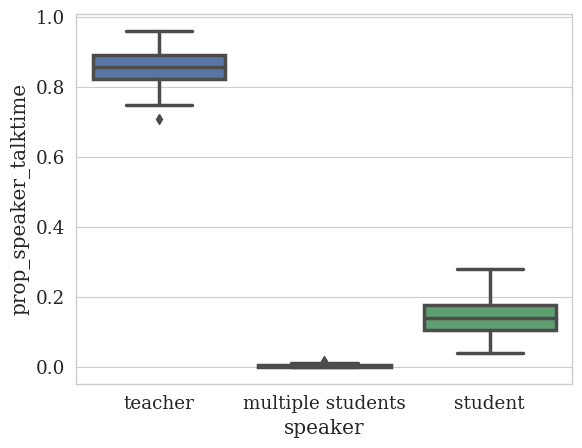

talktime

Proportion statistics
                   count      mean       std       min       25%       50%       75%       max
speaker                                                                                       
multiple students   29.0  0.003755  0.004297  0.000127  0.000892  0.002291  0.004942  0.017520
student             29.0  0.145835  0.054895  0.040153  0.105824  0.139083  0.176111  0.279475
teacher             29.0  0.850410  0.056019  0.709941  0.821598  0.858346  0.890292  0.959623


<Figure size 640x480 with 0 Axes>

In [ ]:
quantitative_analyzer = QuantitativeAnalyzer(data_dir=ANNOTATIONS_DIR)

# Let's plot the talk time ratio between the speakers.
quantitative_analyzer.plot_statistics(
    feature_column=TALK_TIME_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    # Proportion of talk time for each speaker.
    value_as="prop"
)

# We can also print the statistics:
quantitative_analyzer.print_statistics(
    feature_column=TALK_TIME_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    # Proportion of talk time for each speaker.
    value_as="prop"
)

/usr/local/lib/python3.10/dist-packages/edu_convokit/analyzers/quantitative_analyzer.py:51: RuntimeWarning: invalid value encountered in double_scalars
  f"prop_speaker_{feature_column}": speaker_df[feature_column].sum() / feature_sum,


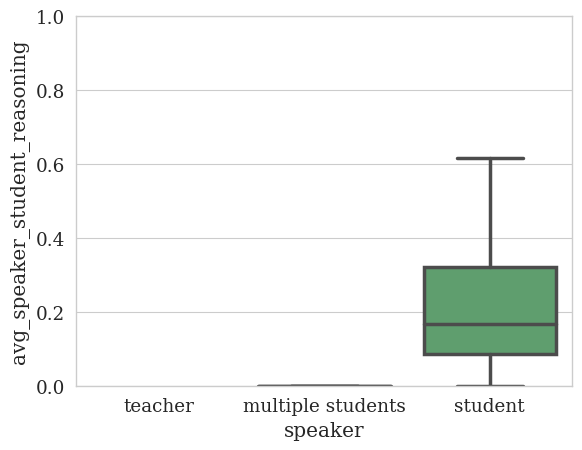

student_reasoning

Average statistics
                   count      mean       std  min       25%       50%       75%       max
speaker                                                                                  
multiple students    1.0  0.000000       NaN  0.0  0.000000  0.000000  0.000000  0.000000
student             29.0  0.208633  0.163928  0.0  0.085106  0.166667  0.321429  0.615385
teacher              0.0       NaN       NaN  NaN       NaN       NaN       NaN       NaN




/usr/local/lib/python3.10/dist-packages/edu_convokit/analyzers/quantitative_analyzer.py:51: RuntimeWarning: invalid value encountered in double_scalars
  f"prop_speaker_{feature_column}": speaker_df[feature_column].sum() / feature_sum,


<Figure size 640x480 with 0 Axes>

In [ ]:
# What about the student reasoning? How often does the student use reasoning?
quantitative_analyzer.plot_statistics(
    feature_column=STUDENT_REASONING_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    # We change this to "avg" because we're now looking at within-speaker statistics.
    value_as="avg",
    # We can set the y-axis limits to [0, 1] because the student reasoning column is a binary column.
    yrange=(0, 1)
)

# We can also print the statistics:
quantitative_analyzer.print_statistics(
    feature_column=STUDENT_REASONING_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    value_as="avg"
)

Note, the tutor has no `student_reasoning` because we did not annotate the tutor's utterances for student reasoning.
We can easily remove the tutor from the plot by dropping na values:

/usr/local/lib/python3.10/dist-packages/edu_convokit/analyzers/quantitative_analyzer.py:51: RuntimeWarning: invalid value encountered in double_scalars
  f"prop_speaker_{feature_column}": speaker_df[feature_column].sum() / feature_sum,
/usr/local/lib/python3.10/dist-packages/edu_convokit/analyzers/quantitative_analyzer.py:51: RuntimeWarning: invalid value encountered in double_scalars
  f"prop_speaker_{feature_column}": speaker_df[feature_column].sum() / feature_sum,


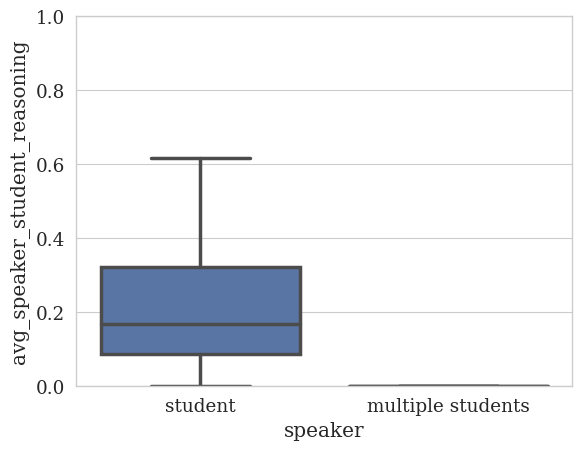

<Figure size 640x480 with 0 Axes>

In [ ]:
quantitative_analyzer.plot_statistics(
    feature_column=STUDENT_REASONING_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    value_as="avg",
    yrange=(0, 1),
    dropna=True
)

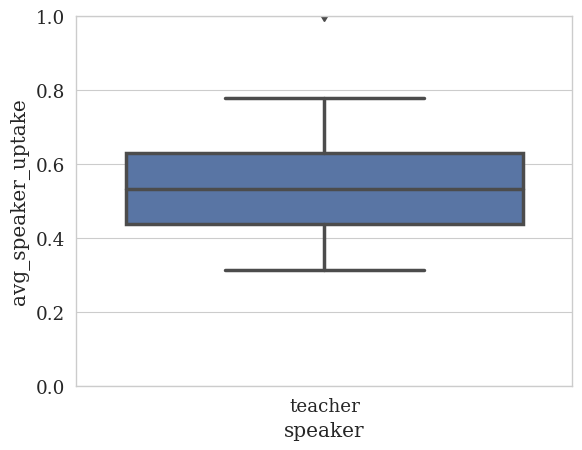

<Figure size 640x480 with 0 Axes>

In [ ]:
# Finally, let's look at the tutor's uptake of the student's utterances.
quantitative_analyzer.plot_statistics(
    feature_column=UPTAKE_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    value_as="avg",
    yrange=(0, 1),
    dropna=True
)